<a href="https://colab.research.google.com/github/varshaelza/Text-Summarization-Categorization/blob/main/BBC_Summarise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [ ]:
data_folder = "/content/drive/MyDrive/BBC Dataset/BBC News Summary/News Articles"
dataf = ["business","entertainment","politics","sport","tech"]
summ_folder = "/content/drive/MyDrive/BBC Dataset/BBC News Summary/Summaries"
summf = ["business","entertainment","politics","sport","tech"]

In [ ]:
dataflist = [f for f in os.listdir(data_folder) if not f.startswith('.')]
summflist = [f for f in os.listdir(summ_folder) if not f.startswith('.')]

In [ ]:
summflist

['sport', 'politics', 'entertainment', 'tech', 'business']

In [ ]:
news = []
newstype = []
summary= []

In [ ]:
dataf

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
for folder in dataf:
    datapath = '/content/drive/MyDrive/BBC Dataset/BBC News Summary/News Articles/'+folder
    summpath = '/content/drive/MyDrive/BBC Dataset/BBC News Summary/Summaries/'+folder
    file1 = os.listdir(datapath)
    file2 = os.listdir(summpath)
    for text_file in file1:
        file_path = datapath + "/" +text_file
        file_path2 = summpath + "/" +text_file
        with open(file_path, errors='replace') as f:
            data = f.readlines()
        with open(file_path2, errors='replace') as f:
            data2 = f.readlines()
        data = ' '.join(data)
        news.append(data)
        newstype.append(folder)
        summary.append(data2)
    
        

In [ ]:
newsdict = {'News':news,'Summary':summary ,'Type':newstype}
df = pd.DataFrame(newsdict)
df.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummary.csv')

In [ ]:
df.head()

,News,Summary,Type
0,UK Coal plunges into deeper loss\n \n Shares i...,"[UK Coal said it was making ""significant progr...",business
1,Umbro profits lifted by Euro 2004\n \n UK spor...,[UK sportswear firm Umbro has posted a 222% ri...,business
2,Ad sales boost Time Warner profit\n \n Quarter...,[TimeWarner said fourth quarter sales rose 2% ...,business
3,Telegraph newspapers axe 90 jobs\n \n The Dail...,"[""Journalists are the lifeblood of any newspap...",business
4,S Korean consumers spending again\n \n South K...,[The country's economy has suffered from an ov...,business


In [ ]:
y = df['Type']
X = df.drop('Type', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train['Type']=y_train
X_test['Type']=y_test

X_train.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')
X_test.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')


**Preprocessing**

In [79]:
import pandas as pd
traindata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
traindata.drop(traindata.columns[traindata.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
traindata

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'..."
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'..."
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ..."
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',..."
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...

In [ ]:
traindata["News_lower"] = traindata["News"].str.lower()
traindata.head()

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'..."
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'..."
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ..."
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',..."
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...

In [ ]:
traindata['news_wo_nltab'] = traindata['News_lower'].replace('\n','.', regex=True)
traindata['news_wo_nltab'] = traindata['news_wo_nltab'].replace('\t',' ', regex=True)
traindata['news_wo_nltab'] = traindata['news_wo_nltab'].replace(r'\.+', ".", regex=True)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
traindata["news_wo_stop"] = traindata["news_wo_nltab"].apply(lambda text: remove_stopwords(text))
#traindata.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
traindata['news_wo_no'] = traindata['news_wo_stop'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')

In [ ]:
#stemming
from nltk.stem import PorterStemmer

# Drop the two columns 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(porter)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem import LancasterStemmer

# Drop the two columns 

stemmer = LancasterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(lancast)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem.snowball import SnowballStemmer

# Drop the two columns 

stemmer = SnowballStemmer(language='english')
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(snow)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
#stemming
from nltk.stem import RegexpStemmer

# Drop the two columns 

stemmer = RegexpStemmer('ing$|s$|e$|able$', min=4)
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

traindata["news_stem(reg)"] = traindata["news_wo_no"].apply(lambda text: stem_words(text))
#traindata.head()

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

traindata["news_lemmatize(wordnet)"] = traindata["news_wo_no"].apply(lambda text: lemmatize_words(text))
#traindata.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import string
PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)
traindata["news_wo_punct"] = traindata["news_lemmatize(wordnet)"].apply(lambda text: remove_punctuation(text))
#traindata.head()

In [ ]:
traindata['news_wo_punct'] = traindata['news_wo_punct'].replace(r'\.+', ".", regex=True)

In [ ]:
STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
traindata["news_wo_punct&single"] = traindata["news_wo_punct"].apply(lambda text: remove_stopwords(text))


In [ ]:
def spl(text):
  return text.split('.',1)[1]
traindata["news_wo_punct&single"]=traindata["news_wo_punct&single"].apply(lambda text: spl(text))
traindata.head()

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year seen on...,federer join all-tim greats. . last year seen ...,federer join all-time greats. . last year seen...,federer join all time greats. . last year seen...,. last year seen one player dominate men tenn...


In [ ]:
import nltk
nltk.download('punkt')
tk=nltk.RegexpTokenizer('[.]', gaps = True)
traindata['news_tokenized(reg)'] = traindata.apply(lambda row: tk.tokenize(row['news_wo_punct&single']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk import sent_tokenize
#nltk.download('punkt')
def tk(text):
  return sent_tokenize(text)
traindata['news_tokenized(sent)'] = traindata["news_wo_punct&single"].apply(lambda text: tk(text))

In [ ]:
from nltk import word_tokenize
#nltk.download('punkt')
def tk(text):
  return word_tokenize(text)
traindata['news_tokenized(words)'] = traindata["news_wo_punct&single"].apply(lambda text: tk(text))

In [ ]:
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(reg)'] = traindata["news_tokenized(reg)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(reg)'] = traindata["news_tokenized(reg)"].apply(lambda text: tk(text))
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(sent)'] = traindata["news_tokenized(sent)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(sent)'] = traindata["news_tokenized(sent)"].apply(lambda text: tk(text))
def tk(text):
  while(' ' in text):
    text.remove(' ')
  return text
traindata['news_tokenized(words)'] = traindata["news_tokenized(words)"].apply(lambda text: tk(text))
def tk(text):
  while('.' in text):
    text.remove('.')
  return text
traindata['news_tokenized(words)'] = traindata["news_tokenized(words)"].apply(lambda text: tk(text))

In [ ]:
traindata['news_tokenized(sent)'][0]

[' .',
 'bubbling time online game broke onto political arena .',
 'presidential election provided showcase many aimed talking directly generation grown joystick gamepads.',
 'expert say reflects video game becoming mainstream part culture society.',
 'first official political campaign game technically launched last week iowa game commissioned democrat hopeful howard dean.',
 'followed suit including frontrunner elections president forever political machine allowed player run entire presidential campaign including cope media.',
 'others helped raise stake bush kerry contest highlighting candidate virtue vices.',
 'phenomenon astonished forefather political games handful multi discipline game enthusiast keen push frontiers.',
 'when started researching political game university five year ago thought going something would take decade happen said gonzalo frasca computer game specialist information technology university copenhagen.',
 'must admit first person surprised seeing fast evolved 

In [ ]:
df = pd.DataFrame(traindata)
df.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')


Seperating Categories

In [ ]:
import pandas as pd
traindata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.05)

In [ ]:
traindata

,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words),final
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'...",
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'...",
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ...",
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',...",
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. . last year 

In [ ]:

buss=pd.DataFrame()
j=0
buss['news']=""
while j<1780:
  if traindata['Category_id'][j]==0:
    buss.loc[len(buss.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
df = pd.DataFrame(buss)
df = pd.DataFrame(buss)
df.to_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')


In [ ]:
buss

,news
0,. mark spencer cut price london region averag...
1,. latin america economy grew best performance...
2,. chancellor gordon brown given £bn boost att...
3,. delta air line cutting domestic fare much p...
4,. retail giant federated department store buy...
...,...
409,. stock market watchdog chairman said willing...
410,. dollar hovered close record low euro friday...
411,. brewing giant inbev agreed buy alfa eco sta...
412,. uk based bank standard chartered said would...


In [ ]:
ent=pd.DataFrame()
j=0
ent['news']=""
while j<1780:
  if traindata['Category_id'][j]==1:
    ent.loc[len(ent.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
ent.to_csv('/content/drive/MyDrive/BBC Dataset/entertainmentlda.csv')

In [ ]:
ent

,news
0,. actor colin farrell make debut television m...
1,. dame muriel spark among three british autho...
2,. model caprice holby city actor jeremy edwar...
3,. pop star christina aguilera marry music exe...
4,. british producer wife swap taking legal act...
...,...
294,. movie monster godzilla received star hollyw...
295,. british film director sir alan parker made ...
296,. oscar nominated film biopic ray surpassed b...
297,. creator buffy vampire slayer take new femal...


In [ ]:
pol=pd.DataFrame()
j=0
pol['news']=""
while j<1780:
  if traindata['Category_id'][j]==2:
    pol.loc[len(pol.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
pol.to_csv('/content/drive/MyDrive/BBC Dataset/politicslda.csv')

In [ ]:
pol

,news
0,. former conservative leader william hague sa...
1,. tony blair likely name may election day par...
2,. new home secretary charles clarke vowed plo...
3,. divorced parent seeking access child often ...
4,. prime minister donned life jacket joined sc...
...,...
329,. thousand civil service job already cut move...
330,. veteran labour mp former cabinet minister j...
331,. tony blair told labour supporter he back st...
332,. parent refuse allow former partner contact ...


In [ ]:
spo=pd.DataFrame()
j=0
spo['news']=""
while j<1780:
  if traindata['Category_id'][j]==3:
    spo.loc[len(spo.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1.
spo.to_csv('/content/drive/MyDrive/BBC Dataset/sportlda.csv')

In [ ]:
spo

,news
0,. zambia technical director kalusha bwalya co...
1,. last year seen one player dominate men tenn...
2,. dundee united eased semi final scottish cup...
3,. world number one lindsay davenport criticis...
4,. greg rusedski forced withdraw open marseill...
...,...
408,. stefan koubek say banned three month intern...
409,. dundee united manager ian mccall reprieve s...
410,. iaaf athletics world governing body met ant...
411,. euan murray named scotland training squad e...


In [ ]:
tech=pd.DataFrame()
j=0
tech['news']=""
while j<1780:
  if traindata['Category_id'][j]==4:
    tech.loc[len(tech.index)]=[traindata['news_wo_punct&single'][j]]
  j=j+1
tech.to_csv('/content/drive/MyDrive/BBC Dataset/techlda.csv')

In [ ]:
tech

,news
0,. bubbling time online game broke onto politi...
1,. chinese net using population look set excee...
2,. movie industry struck file sharing network ...
3,. fast web access encouraging people express ...
4,. bbc online search engine used record amount...
...,...
315,. thousand technology lover industry expert g...
316,. fixed line phone home could soon endangered...
317,. know art know like new search technology co...
318,. ask jeeves bought bloglines website improve...


Rough Work

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.05)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(buss['news']);

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(tfidf_matrix);

In [ ]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['rise', 'spending', 'year', 'dollar', 'figure', 'price', 'economic', 'rate', 'growth', 'economy']


Topic #1:
['new', 'sale', 'bank', 'would', 'year', 'share', 'firm', 'company', 'mr', 'bn']


Topic #2:
['driven', 'supply', 'highest', 'average', 'recovery', 'slow', 'nation', 'export', 'region', 'decade']




Vectorization+LDA

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')

In [ ]:
train

,Unnamed: 0,news
0,0,. mark spencer cut price london region averag...
1,1,. latin america economy grew best performance...
2,2,. chancellor gordon brown given £bn boost att...
3,3,. delta air line cutting domestic fare much p...
4,4,. retail giant federated department store buy...
...,...,...
409,409,. stock market watchdog chairman said willing...
410,410,. dollar hovered close record low euro friday...
411,411,. brewing giant inbev agreed buy alfa eco sta...
412,412,. uk based bank standard chartered said would...


In [ ]:

train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
train

,news
0,. mark spencer cut price london region averag...
1,. latin america economy grew best performance...
2,. chancellor gordon brown given £bn boost att...
3,. delta air line cutting domestic fare much p...
4,. retail giant federated department store buy...
...,...
409,. stock market watchdog chairman said willing...
410,. dollar hovered close record low euro friday...
411,. brewing giant inbev agreed buy alfa eco sta...
412,. uk based bank standard chartered said would...


In [ ]:
data = train.news.values.tolist()

In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['mark', 'spencer', 'cut', 'price', 'london', 'region', 'average', 'according', 'research', 'city', 'investment', 'bank', 'dresdner', 'kleinwort', 'wasserstein', 'said', 'in', 'spite', 'snow', 'uk', 'still', 'feel', 'early', 'cutting', 'price', 'spring', 'merchandise', 'stuart', 'rose', 'head', 'said', 'last', 'year', 'price', 'high', 'we', 'bringing', 'range', 'new', 'price', 'point', 'compete', 'mid', 'market', 'retailer', 'like', 'next', 'said', 'next', 'one', 'biggest', 'competitor', 'move', 'may', 'force', 'lower', 'prices', 'drkw', 'said', 'cut', 'either', 'clear', 'stock', 'could', 'indicate', 'longer', 'term', 'step', 'change', 'pricing', 'certain', 'areas', 'either', 'way', 'cannot', 'good', 'news', 'margin', 'added', 'we', 'brought', 'quite', 'lot', 'new', 'clothing', 'new', 'price', 'point', 'part', 'stuart', 'rose', 'strategy', 'quality', 'style', 'and', 'price', 'said', 'spokesman', 'many', 'analyst', 'believe', 'february', 'proving', 'difficult', 'month', 'retailer', 'br

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:1])
import joblib

joblib.dump(data_lemmatized, '/content/drive/MyDrive/BBC Dataset/buss_lemm.jl')

['cut price region accord research say spite snow feel cut price spring merchandise stuart rise head say year price bring range price point compete market retailer say competitor move may force price say cut stock could indicate term step change price area way can news margin add bring lot clothing price point part rise strategy quality style price say spokesman analyst believe prove month retailer consortium figure week expect reflect trading environment produce reseach show basket street average compare year week receive statement owner confirm rebidde company follow financier issue press release say group spike share price follow spokesman say evidence line finance bid say takeover panel touch begin week find know development']


['/content/drive/MyDrive/BBC Dataset/buss_lemm.jl']

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
      token_pattern='[a-zA-Z0-9]{3,}',  
   )
data_vec= vectorizer.fit_transform(data_lemmatized)


['/content/drive/MyDrive/BBC Dataset/buss_cv.jl']

In [ ]:
lda_model =LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1,  perp_tol=0.1,
 random_state=100, topic_word_prior=None, verbose=0)
lda_output = lda_model.fit_transform(data_vec)
print(lda_model) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
print("Log Likelihood: ", lda_model.score(data_vec))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vec))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -206612.72601753456
Perplexity:  399.2026163403905
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vec)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
              perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
        iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vec))


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -47142.4746812507
Model Perplexity:  417.05207857890935


In [ ]:
import joblib

joblib.dump(best_lda_model, '/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')
# then reload it with
lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')


In [ ]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vec)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics
df_document_topic.to_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_doctopic.csv')

In [ ]:
lda_output

array([[1.04177077e-03, 1.04170941e-03, 1.04193563e-03, ...,
        1.04177719e-03, 4.22143117e-01, 5.69522663e-01],
       [1.69508800e-03, 1.69492033e-03, 1.69518592e-03, ...,
        1.69495769e-03, 1.69521427e-03, 9.84744788e-01],
       [1.09900528e-03, 1.09891098e-03, 1.09926677e-03, ...,
        1.09892714e-03, 1.09948385e-03, 9.90108304e-01],
       ...,
       [3.57181396e-03, 3.57152325e-03, 3.57195199e-03, ...,
        3.57151128e-03, 9.67853223e-01, 3.57255446e-03],
       [7.87872890e-02, 6.02434681e-04, 6.02547461e-04, ...,
        6.02424278e-04, 5.20238641e-01, 3.96756878e-01],
       [9.52464652e-04, 9.52389455e-04, 9.52595776e-04, ...,
        9.52404887e-04, 1.78351188e-01, 7.49375049e-01]])

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()


In [ ]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords
df_topic_keywords.to_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_topics.csv')

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')
train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
train.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

Sentence Scoring

In [ ]:
import joblib

lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/buss_cv_lda.jl')


In [ ]:
import nltk
nltk.download('punkt')
text=train['news'][22]
a_list = nltk.tokenize.sent_tokenize(text)
s=len(a_list)
df=pd.DataFrame()
j=0
df['news']=""
while j<s:
  df.loc[len(df.index)]=[a_list[j]]
  j=j+1
#df.to_csv('/content/drive/MyDrive/BBC Dataset/sent.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,news
0,.
1,india raised limit foreign direct investment t...
2,.
3,communication minister dayanidhi maran said ne...
4,government hope increase number mobile user mi...
5,decision raise limit foreign investor faced co...
6,potential foreign investor however need govern...
7,key positions chief executive chief technology...
8,.
9,analyst investor welcomed government decision.


In [ ]:
data = df.news.values.tolist()

In [ ]:
d=[' ']
d[0]=data[1]
d

['india raised limit foreign direct investment telecom company .']

In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(d))
print(data_words[:2])

[['india', 'raised', 'limit', 'foreign', 'direct', 'investment', 'telecom', 'company']]


In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:1])

['raise limit investment company']


In [ ]:
data_lemmatized

['raise limit investment company']

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
      token_pattern='[a-zA-Z0-9]{3,}',  
   )
d=joblib.load('/content/drive/MyDrive/BBC Dataset/buss_lemm.jl')
vectorizer.fit_transform(d)
data_vec=vectorizer.transform(data_lemmatized)


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
topic_probability_scores = lda_model.transform(data_vec)
df_topic_keywords=pd.read_csv('/content/drive/MyDrive/BBC Dataset/buss_cv_topics.csv')
topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores),1:14].values.tolist()
    
    # Step 5: Infer Topic
infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]

# Predict the topic

print(topic)
print(infer_topic)
topic_probability_scores


['say', 'year', 'rise', 'growth', 'economy', 'rate', 'price', 'month', 'country', 'market', 'fall', 'government', 'expect']
Topic 9


array([[0.02000267, 0.02000021, 0.2551135 , 0.02000512, 0.02000207,
        0.02000004, 0.02000015, 0.0200001 , 0.02000721, 0.58486893]])

In [ ]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,card,debt,creditor,credit,say,parent,bankruptcy,group,payment,firm,crisis,would,avoid,offer,pay
Topic 1,store,sale,chain,combine,deal,competition,retailer,may,speed,expect,struggle,bring,quarter,say,create
Topic 2,say,company,firm,fraud,government,would,case,court,oil,claim,pay,tax,state,charge,year
Topic 3,director,land,say,company,year,property,shareholder,settlement,employ,government,tell,insurance,firm,fail,ask
Topic 4,pension,ebber,phone,member,trial,fraud,share,year,profit,appear,would,emerge,scheme,sentence,worker
Topic 5,deficit,import,car,dollar,slide,expand,export,year,trade,difference,impact,indicate,accept,fall,maker
Topic 6,company,contract,year,rise,quarter,group,oil,report,say,economy,hope,rate,consider,accuse,meet
Topic 7,food,charge,chain,retailer,confidence,say,year,executive,team,work,sign,help,earning,share,amount
Topic 8,say,firm,would,share,make,market,company,year,deal,offer,could,take,cost,may,business
Topic 9,say,year,rise,growth,economy,rate,price,month,country,market,fall,government,expect,report,dollar


Gensim LDA

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun , adjective,verb and adverb
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

In [ ]:
train

,Unnamed: 0,News,Summary,Category_id,Type,News_lower,news_wo_nltab,news_wo_stop,news_wo_no,news_stem(porter),news_stem(lancast),news_stem(snow),news_stem(reg),news_lemmatize(wordnet),news_wo_punct,news_wo_punct&single,news_tokenized(reg),news_tokenized(sent),news_tokenized(words)
0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,online games play with politics\n \n after bub...,online games play with politics. . after bubbl...,"online games play politics. . bubbling time, o...","online games play politics. . bubbling time, o...","onlin game play politics. . bubbl time, onlin ...","onlin gam play politics. . bubbl time, onlin g...","onlin game play politics. . bubbl time, onlin ...","onlin game play politics. . bubbl time, onlin ...","online game play politics. . bubbling time, on...",online game play politics. . bubbling time on...,. bubbling time online game broke onto politi...,[' bubbling time online game broke onto politi...,"[' .', 'bubbling time online game broke onto p...","['bubbling', 'time', 'online', 'game', 'broke'..."
1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,hague 'given up' his pm ambition\n \n former c...,hague 'given up' his pm ambition. . former con...,hague 'given up' pm ambition. . former conserv...,hague 'given up' pm ambition. . former conserv...,hagu 'given up' pm ambition. . former conserv ...,hagu 'given up' pm ambition. . form conserv le...,hagu given up pm ambition. . former conserv le...,hagu 'given up' pm ambition. . former conserva...,hague 'given up' pm ambition. . former conserv...,hague given up pm ambition. . former conserv...,. former conservative leader william hague sa...,[' former conservative leader william hague sa...,"[' .', 'former conservative leader william hag...","['former', 'conservative', 'leader', 'william'..."
2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,m&s cuts prices by average of 24%\n \n marks &...,m&s cuts prices by average of 24%. . marks & s...,m&s cuts prices average 24%. . marks & spencer...,m&s cuts prices average %. . marks & spencer c...,m& cut price averag %. . mark & spencer cut pr...,m&s cut pric av %. . mark & spent cut pric lon...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price averag %. . mark & spencer cut p...,m&s cut price average %. . mark & spencer cut ...,m s cut price average . . mark spencer cut ...,. mark spencer cut price london region averag...,[' mark spencer cut price london region averag...,"[' .', 'mark spencer cut price london region a...","['mark', 'spencer', 'cut', 'price', 'london', ..."
3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,zambia confident and cautious\n \n zambia's te...,zambia confident and cautious. . zambia's tech...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia's technica...,zambia confid cautious. . zambia' technic dire...,zamb confid cautious. . zambia's techn directo...,zambia confid cautious. . zambia technic direc...,zambia confident cautious. . zambia' technical...,zambia confident cautious. . zambia's technica...,zambia confident cautious. . zambia s technica...,. zambia technical director kalusha bwalya co...,[' zambia technical director kalusha bwalya co...,"[' .', 'zambia technical director kalusha bwal...","['zambia', 'technical', 'director', 'kalusha',..."
4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,federer joins all-time greats\n \n the last ye...,federer joins all-time greats. . the last year...,federer joins all-time greats. . last year see...,federer joins all-time greats. . last year see...,feder join all-tim greats. . last year seen on...,fed join all-time greats. . last year seen on ...,feder join all-tim greats. .

In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
processed_docs = train['news_wo_punct&single'].map(preprocess)
processed_docs = processed_docs.values.tolist()
processed_docs=lemmatization(processed_docs)

In [ ]:
processed_docs


[['accuse',
  'terrify',
  'scrutiny',
  'labour',
  'unveil',
  'detail',
  'fight',
  'next',
  'general',
  'election',
  'ditch',
  'brief',
  'westminster',
  'instead',
  'marginal',
  'seat',
  'deliver',
  'party',
  'message',
  'election',
  'deny',
  'party',
  'try',
  'hide',
  'promise',
  'positive',
  'upbeat',
  'election',
  'campaign',
  'labour',
  'ever',
  'run',
  'co',
  'say',
  'labour',
  'plan',
  'show',
  'terrify',
  'face',
  'proper',
  'scrutiny',
  'time',
  'british',
  'people',
  'look',
  'accountability',
  'openness',
  'government',
  'turn',
  'back',
  'abandon',
  'plan',
  'tour',
  'country',
  'scare',
  'face',
  'journalist',
  'conference',
  'rather',
  'beg',
  'question',
  'get',
  'hide',
  'general',
  'election',
  'widely',
  'expect',
  'next',
  'may',
  'party',
  'step',
  'campaign',
  'preparation',
  'say',
  'economy',
  'would',
  'take',
  'stage',
  'campaign',
  'would',
  'watershed',
  'election',
  'last',
  'sta

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandon
1 accountability
2 accuse
3 also
4 appeal
5 approach
6 aside
7 avoid
8 back
9 base
10 beg


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
import joblib
joblib.dump(dictionary, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_dict.jl')
# then reload it with
dictionary=joblib.load( '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_dict.jl')

In [ ]:
dictionary

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(11, 1),
 (17, 2),
 (22, 1),
 (30, 3),
 (41, 1),
 (47, 1),
 (55, 2),
 (72, 1),
 (112, 1),
 (121, 1),
 (124, 1),
 (134, 1),
 (136, 1),
 (140, 1),
 (150, 2),
 (151, 1),
 (154, 1),
 (157, 1),
 (167, 1),
 (169, 1),
 (172, 1),
 (174, 1),
 (185, 1),
 (189, 1),
 (207, 2),
 (223, 1),
 (261, 1),
 (271, 1),
 (285, 5),
 (303, 1),
 (326, 1),
 (332, 1),
 (338, 1),
 (355, 1),
 (375, 3),
 (376, 1),
 (377, 3),
 (378, 1),
 (379, 3),
 (380, 1),
 (381, 1),
 (382, 1),
 (383, 1),
 (384, 5),
 (385, 2),
 (386, 1),
 (387, 1),
 (388, 1),
 (389, 1)]

In [ ]:
bow_doc_10 = bow_corpus[10]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
bow_doc_10[i][1]))

Word 11 ("country") appears 1 time.
Word 17 ("economy") appears 2 time.
Word 22 ("expect") appears 1 time.
Word 30 ("government") appears 3 time.
Word 41 ("may") appears 1 time.
Word 47 ("next") appears 1 time.
Word 55 ("promise") appears 2 time.
Word 72 ("time") appears 1 time.
Word 112 ("high") appears 1 time.
Word 121 ("measure") appears 1 time.
Word 124 ("order") appears 1 time.
Word 134 ("represent") appears 1 time.
Word 136 ("rule") appears 1 time.
Word 140 ("tell") appears 1 time.
Word 150 ("first") appears 2 time.
Word 151 ("level") appears 1 time.
Word 154 ("month") appears 1 time.
Word 157 ("see") appears 1 time.
Word 167 ("conservative") appears 1 time.
Word 169 ("could") appears 1 time.
Word 172 ("increase") appears 1 time.
Word 174 ("low") appears 1 time.
Word 185 ("accord") appears 1 time.
Word 189 ("analyst") appears 1 time.
Word 207 ("grow") appears 2 time.
Word 223 ("need") appears 1 time.
Word 261 ("ago") appears 1 time.
Word 271 ("new") appears 1 time.
Word 285 ("fal

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.06217043156241422),
 (1, 0.06814301723899971),
 (2, 0.07760514817524797),
 (3, 0.07911125048892133),
 (4, 0.03392386233727486),
 (5, 0.05009948201303719),
 (6, 0.05347349987691074),
 (7, 0.05347349987691074),
 (8, 0.4236847153728738),
 (9, 0.05741914733486476),
 (10, 0.07485650597851377),
 (11, 0.12655013686248243),
 (12, 0.047152230223553394),
 (13, 0.06142952849948565),
 (14, 0.06142952849948565),
 (15, 0.06627510168879952),
 (16, 0.06913620909737155),
 (17, 0.10694699975382148),
 (18, 0.12142285221780583),
 (19, 0.4157391805058991),
 (20, 0.05622214207364495),
 (21, 0.05508355107644116),
 (22, 0.034377012231647984),
 (23, 0.17535657267158503),
 (24, 0.05804149051726337),
 (25, 0.06372677390903228),
 (26, 0.04637427530903679),
 (27, 0.125871261626318),
 (28, 0.02963174954620123),
 (29, 0.05397411247064818),
 (30, 0.033479344396500986),
 (31, 0.04676001113739669),
 (32, 0.06454568201268944),
 (33, 0.06071142610890291),
 (34, 0.04349845848536096),
 (35, 0.3935549945155146),
 (36

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.019*"game" + 0.013*"play" + 0.011*"last" + 0.010*"player" + 0.010*"show" + 0.009*"tell" + 0.008*"back" + 0.008*"season" + 0.008*"go" + 0.008*"contract"
Topic: 1 
Words: 0.013*"use" + 0.012*"go" + 0.011*"people" + 0.010*"get" + 0.009*"think" + 0.009*"first" + 0.009*"time" + 0.008*"take" + 0.008*"last" + 0.007*"tell"
Topic: 2 
Words: 0.027*"film" + 0.017*"good" + 0.014*"child" + 0.011*"award" + 0.011*"work" + 0.010*"include" + 0.009*"go" + 0.008*"time" + 0.008*"people" + 0.008*"could"
Topic: 3 
Words: 0.022*"good" + 0.017*"take" + 0.014*"people" + 0.010*"go" + 0.010*"game" + 0.010*"last" + 0.010*"film" + 0.009*"award" + 0.009*"top" + 0.008*"week"
Topic: 4 
Words: 0.017*"government" + 0.015*"election" + 0.010*"labour" + 0.009*"people" + 0.009*"rise" + 0.008*"plan" + 0.008*"tell" + 0.008*"could" + 0.007*"see" + 0.007*"country"
Topic: 5 
Words: 0.016*"play" + 0.015*"first" + 0.010*"last" + 0.009*"film" + 0.009*"take" + 0.009*"time" + 0.008*"include" + 0.008*"come" + 0.007

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.009*"game" + 0.007*"election" + 0.006*"labour" + 0.005*"week" + 0.004*"play" + 0.004*"may" + 0.004*"card" + 0.004*"bid" + 0.004*"child" + 0.004*"season"
Topic: 1 Word: 0.008*"growth" + 0.007*"economy" + 0.007*"firm" + 0.007*"oil" + 0.007*"rise" + 0.007*"government" + 0.007*"rate" + 0.006*"economic" + 0.005*"election" + 0.005*"share"
Topic: 2 Word: 0.007*"mail" + 0.006*"injury" + 0.006*"use" + 0.006*"police" + 0.005*"play" + 0.005*"arrest" + 0.005*"program" + 0.005*"phone" + 0.004*"man" + 0.004*"election"
Topic: 3 Word: 0.010*"broadband" + 0.010*"film" + 0.008*"use" + 0.007*"computer" + 0.007*"network" + 0.007*"technology" + 0.006*"name" + 0.006*"show" + 0.006*"people" + 0.006*"internet"
Topic: 4 Word: 0.006*"web" + 0.006*"rate" + 0.004*"technology" + 0.004*"list" + 0.004*"month" + 0.004*"mobile" + 0.004*"film" + 0.004*"estimate" + 0.004*"event" + 0.004*"set"
Topic: 5 Word: 0.008*"film" + 0.006*"phone" + 0.006*"government" + 0.005*"trial" + 0.005*"country" + 0.004*"poor

In [ ]:
import joblib

joblib.dump(lda_model_tfidf, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_tfidf_genlda.jl')
# then reload it with
lda_model_tfidf = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_tfidf_genlda.jl')

In [ ]:
import joblib

joblib.dump(lda_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_bow_genlda.jl')
# then reload it with
lda_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_bow_genlda.jl')

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[6]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5491935014724731	 
Topic: 0.006*"web" + 0.006*"rate" + 0.004*"technology" + 0.004*"list" + 0.004*"month" + 0.004*"mobile" + 0.004*"film" + 0.004*"estimate" + 0.004*"event" + 0.004*"set"

Score: 0.4297484755516052	 
Topic: 0.008*"growth" + 0.007*"economy" + 0.007*"firm" + 0.007*"oil" + 0.007*"rise" + 0.007*"government" + 0.007*"rate" + 0.006*"economic" + 0.005*"election" + 0.005*"share"


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -BOW
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.30889494731116074


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -TFIDF
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2855581277217931


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=50, step=1)

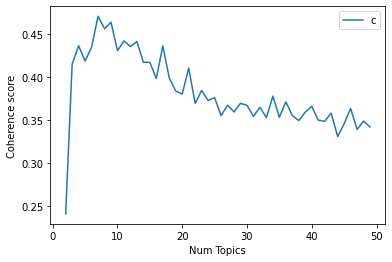

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2413
Num Topics = 3  has Coherence Value of 0.415
Num Topics = 4  has Coherence Value of 0.4364
Num Topics = 5  has Coherence Value of 0.4186
Num Topics = 6  has Coherence Value of 0.4346
Num Topics = 7  has Coherence Value of 0.4706
Num Topics = 8  has Coherence Value of 0.4562
Num Topics = 9  has Coherence Value of 0.4636
Num Topics = 10  has Coherence Value of 0.4307
Num Topics = 11  has Coherence Value of 0.442
Num Topics = 12  has Coherence Value of 0.4355
Num Topics = 13  has Coherence Value of 0.4412
Num Topics = 14  has Coherence Value of 0.4173
Num Topics = 15  has Coherence Value of 0.4171
Num Topics = 16  has Coherence Value of 0.3984
Num Topics = 17  has Coherence Value of 0.4363
Num Topics = 18  has Coherence Value of 0.3988
Num Topics = 19  has Coherence Value of 0.3838
Num Topics = 20  has Coherence Value of 0.3803
Num Topics = 21  has Coherence Value of 0.4105
Num Topics = 22  has Coherence Value of 0.3695
Num Topics = 23  has Co

In [ ]:
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"use" + 0.020*"people" + 0.015*"technology" + 0.011*"service" + '
  '0.011*"software" + 0.011*"net" + 0.011*"user" + 0.010*"company" + '
  '0.010*"phone" + 0.010*"network"'),
 (1,
  '0.021*"market" + 0.015*"rate" + 0.015*"rise" + 0.015*"last" + '
  '0.014*"growth" + 0.013*"sale" + 0.012*"economy" + 0.011*"month" + '
  '0.011*"firm" + 0.011*"price"'),
 (2,
  '0.026*"music" + 0.021*"game" + 0.020*"show" + 0.015*"see" + 0.014*"people" '
  '+ 0.013*"think" + 0.012*"player" + 0.012*"go" + 0.012*"high" + '
  '0.011*"could"'),
 (3,
  '0.018*"play" + 0.016*"last" + 0.015*"go" + 0.015*"first" + 0.014*"take" + '
  '0.012*"win" + 0.012*"get" + 0.011*"match" + 0.010*"final" + 0.010*"week"'),
 (4,
  '0.019*"law" + 0.014*"tell" + 0.014*"case" + 0.013*"government" + '
  '0.013*"man" + 0.012*"use" + 0.011*"trial" + 0.011*"wait" + 0.010*"could" + '
  '0.010*"police"'),
 (5,
  '0.067*"film" + 0.045*"good" + 0.031*"award" + 0.026*"include" + '
  '0.021*"star" + 0.019*"name" + 0.018*"actor" 

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -BOW
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4705922985520442


In [ ]:
import joblib

joblib.dump(optimal_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_optbow_genlda.jl')
# then reload it with
optimal_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_optbow_genlda.jl')

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=processed_docs, start=2, limit=50, step=1)

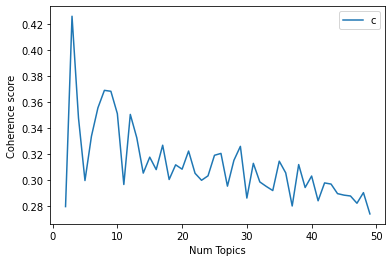

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2793
Num Topics = 3  has Coherence Value of 0.426
Num Topics = 4  has Coherence Value of 0.3476
Num Topics = 5  has Coherence Value of 0.2994
Num Topics = 6  has Coherence Value of 0.3335
Num Topics = 7  has Coherence Value of 0.3554
Num Topics = 8  has Coherence Value of 0.3689
Num Topics = 9  has Coherence Value of 0.3682
Num Topics = 10  has Coherence Value of 0.351
Num Topics = 11  has Coherence Value of 0.2964
Num Topics = 12  has Coherence Value of 0.3504
Num Topics = 13  has Coherence Value of 0.3324
Num Topics = 14  has Coherence Value of 0.3051
Num Topics = 15  has Coherence Value of 0.3174
Num Topics = 16  has Coherence Value of 0.3078
Num Topics = 17  has Coherence Value of 0.3266
Num Topics = 18  has Coherence Value of 0.3002
Num Topics = 19  has Coherence Value of 0.3115
Num Topics = 20  has Coherence Value of 0.3082
Num Topics = 21  has Coherence Value of 0.3221
Num Topics = 22  has Coherence Value of 0.305
Num Topics = 23  has Coh

In [ ]:
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.024*"survey" + 0.001*"criminal" + 0.001*"cheap" + 0.001*"store" + '
  '0.001*"trend" + 0.001*"corporate" + 0.001*"general" + 0.001*"annual" + '
  '0.001*"program" + 0.001*"trial"'),
 (1,
  '0.006*"game" + 0.006*"film" + 0.005*"play" + 0.005*"player" + '
  '0.005*"market" + 0.004*"go" + 0.004*"good" + 0.004*"take" + 0.004*"last" + '
  '0.004*"match"'),
 (2,
  '0.001*"office" + 0.001*"admit" + 0.001*"cut" + 0.001*"attack" + '
  '0.001*"strike" + 0.001*"survey" + 0.001*"cheap" + 0.001*"former" + '
  '0.001*"interested" + 0.001*"least"'),
 (3,
  '0.030*"city" + 0.026*"criminal" + 0.025*"interested" + 0.022*"club" + '
  '0.019*"side" + 0.016*"stay" + 0.011*"former" + 0.011*"admit" + '
  '0.011*"cheap" + 0.008*"understand"'),
 (4,
  '0.001*"french" + 0.001*"direct" + 0.001*"film" + 0.001*"office" + '
  '0.001*"actor" + 0.001*"star" + 0.001*"category" + 0.001*"movie" + '
  '0.001*"ceremony" + 0.001*"maker"'),
 (5,
  '0.001*"fund" + 0.001*"debt" + 0.001*"drive" + 0.001*"address" + '


In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score -TFIDF
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.36889529363987617


In [ ]:
import joblib

joblib.dump(optimal_model, '/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_opttfidf_genlda.jl')
# then reload it with
optimal_model = joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/rev_opttfidf_genlda.jl')

In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install --upgrade pandas
import pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)


Scoring

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/businesslda.csv')

In [ ]:
import nltk
nltk.download('punkt')
text=train['news'][0]
a_list = nltk.tokenize.sent_tokenize(text)
s=len(a_list)
df=pd.DataFrame()
j=0
df['news']=""
while j<s:
  if [a_list[j]]==[' .'] :
    j=j+1;
  elif [a_list[j]]==['.'] :
    j=j+1
  else:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1;

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,news
0,mark spencer cut price london region average a...
1,dresdner kleinwort wasserstein said in spite s...
2,stuart rose head said last year price high.
3,we bringing range new price point compete mid ...
4,next one biggest competitor move may force low...
5,drkw said cut either clear stock could indicat...
6,we brought quite lot new clothing new price po...
7,many analyst believe february proving difficul...
8,separately investment bank goldman sachs produ...
9,strange week tuesday received statement philip...


In [ ]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [ ]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
processed_docs = df['news'].map(preprocess)
processed_docs = processed_docs.values.tolist()
processed_docs=lemmatization(processed_docs)

In [ ]:
processed_docs

[['cut', 'price', 'region', 'average', 'accord', 'research'],
 ['say',
  'spite',
  'snow',
  'still',
  'feel',
  'early',
  'cut',
  'price',
  'spring',
  'merchandise'],
 ['say', 'last', 'year', 'price', 'high'],
 ['bring',
  'range',
  'new',
  'price',
  'point',
  'compete',
  'mid',
  'market',
  'retailer',
  'next',
  'say'],
 ['big', 'competitor', 'move', 'may', 'force', 'low', 'price'],
 ['say',
  'cut',
  'clear',
  'stock',
  'could',
  'indicate',
  'long',
  'term',
  'step',
  'change',
  'price',
  'certain',
  'area',
  'way',
  'can',
  'good',
  'news',
  'margin',
  'add'],
 ['bring',
  'quite',
  'lot',
  'new',
  'clothing',
  'new',
  'price',
  'point',
  'part',
  'rise',
  'strategy',
  'quality',
  'style',
  'price',
  'say',
  'spokesman'],
 ['many',
  'analyst',
  'believe',
  'prove',
  'difficult',
  'month',
  'retailer',
  'retail',
  'consortium',
  'figure',
  'due',
  'week',
  'expect',
  'reflect',
  'tough',
  'trading',
  'environment'],
 ['se

In [ ]:
dictionary=joblib.load( '/content/drive/MyDrive/BBC Dataset/buss_dict.jl')


In [ ]:
#dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 accord
1 add
2 analyst
3 area
4 average
5 begin
6 believe
7 bid
8 big
9 bring
10 can


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [ ]:
bow_corpus

[[(0, 1), (4, 1), (17, 1), (54, 1), (60, 1), (62, 1)],
 [(17, 1), (21, 1), (24, 1), (54, 1), (71, 1)],
 [(33, 1), (38, 1), (54, 1)],
 [(9, 1), (44, 1), (48, 1), (50, 1), (53, 1), (54, 1), (57, 1), (64, 1)],
 [(8, 1), (29, 1), (42, 1), (45, 1), (47, 1), (54, 1)],
 [(1, 1),
  (3, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (16, 1),
  (17, 1),
  (30, 1),
  (35, 1),
  (40, 1),
  (49, 1),
  (54, 1),
  (70, 1),
  (72, 1),
  (74, 1),
  (77, 1)],
 [(9, 1), (41, 1), (48, 2), (52, 1), (53, 1), (54, 2), (65, 1), (68, 1)],
 [(2, 1),
  (6, 1),
  (19, 1),
  (20, 1),
  (23, 1),
  (25, 1),
  (43, 1),
  (46, 1),
  (56, 1),
  (59, 1),
  (63, 1),
  (64, 1),
  (75, 1),
  (76, 1),
  (78, 1)],
 [(4, 1), (14, 1), (30, 1), (33, 1), (38, 1), (55, 1), (67, 1)],
 [(13, 1), (15, 1), (51, 1), (58, 1), (69, 1), (78, 1)],
 [(28, 2), (31, 1), (36, 1), (54, 1), (61, 1), (66, 1)],
 [(7, 1), (22, 1), (26, 1), (34, 1), (39, 1), (68, 1)],
 [(5, 1), (18, 1), (27, 1), (37, 1), (73, 1), (78, 1)]]

In [ ]:
bow_doc_10 = bow_corpus[0]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
bow_doc_10[i][1]))

Word 0 ("accord") appears 1 time.
Word 4 ("average") appears 1 time.
Word 17 ("cut") appears 1 time.
Word 54 ("price") appears 1 time.
Word 60 ("region") appears 1 time.
Word 62 ("research") appears 1 time.


In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    

[(0, 0.5066814256619627),
 (4, 0.3697567723084707),
 (17, 0.2896609846724346),
 (54, 0.09590746560148669),
 (60, 0.5066814256619627),
 (62, 0.5066814256619627)]
[(17, 0.31175554065970107),
 (21, 0.5453297135549838),
 (24, 0.5453297135549838),
 (54, 0.10322302751855054),
 (71, 0.5453297135549838)]
[(33, 0.6955054972221509), (38, 0.6955054972221509), (54, 0.18040012934456867)]
[(9, 0.32107192908083676),
 (44, 0.43996809511036533),
 (48, 0.32107192908083676),
 (50, 0.43996809511036533),
 (53, 0.32107192908083676),
 (54, 0.08327959702177952),
 (57, 0.43996809511036533),
 (64, 0.32107192908083676)]
[(8, 0.4456198336052529),
 (29, 0.4456198336052529),
 (42, 0.4456198336052529),
 (45, 0.4456198336052529),
 (47, 0.4456198336052529),
 (54, 0.08434938937617432)]
[(1, 0.2682671904710922),
 (3, 0.2682671904710922),
 (10, 0.2682671904710922),
 (11, 0.2682671904710922),
 (12, 0.2682671904710922),
 (16, 0.2682671904710922),
 (17, 0.1533637007625513),
 (30, 0.19577116002478198),
 (35, 0.26826719047109

In [ ]:
corpus_tfidf

In [ ]:
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))



Score: 0.9006560444831848	 
Topic: 0.010*"oil" + 0.009*"rate" + 0.007*"economy" + 0.006*"price" + 0.006*"high" + 0.006*"fall" + 0.005*"growth" + 0.005*"production" + 0.005*"offer" + 0.005*"rise"

Score: 0.08791369199752808	 
Topic: 0.008*"dollar" + 0.006*"job" + 0.006*"oil" + 0.006*"fall" + 0.005*"company" + 0.005*"price" + 0.005*"sale" + 0.005*"figure" + 0.005*"economy" + 0.004*"share"


In [ ]:
processed_docs[1]

['economy',
 'grow',
 'good',
 'performance',
 'export',
 'register',
 'good',
 'performance',
 'decade',
 'say',
 'region',
 'grow',
 'year',
 'say',
 'regional',
 'export',
 'reach',
 'doubt',
 'strength',
 'recovery',
 'overheat',
 'chinese',
 'economy',
 'however',
 'pose',
 'risk',
 'organisation',
 'also',
 'warn',
 'high',
 'oil',
 'price',
 'raise',
 'risk',
 'inflation',
 'recession',
 'nevertheless',
 'economic',
 'still',
 'forecast',
 'growth',
 'strong',
 'recovery',
 'country',
 'boost',
 'overall',
 'performance',
 'region',
 'also',
 'say',
 'large',
 'latin',
 'american',
 'economy',
 'grow',
 'second',
 'time',
 'year',
 'chinese',
 'economic',
 'strength',
 'help',
 'boost',
 'export',
 'strong',
 'demand',
 'agricultural',
 'mining',
 'product',
 'fact',
 'latin',
 'american',
 'export',
 'grow',
 'high',
 'oil',
 'price',
 'also',
 'help',
 'boost',
 'export',
 'important',
 'oil',
 'exporter',
 'regional',
 'free',
 'trade',
 'agreement',
 'contribute',
 'region',

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(11)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7252,"dollar, job, oil, fall, company, price, sale, ...","[cut, price, region, average, accord, research]"
1,1,7.0,0.7049,"oil, rate, economy, price, high, fall, growth,...","[say, spite, snow, still, feel, early, cut, pr..."
2,2,1.0,0.6499,"dollar, job, oil, fall, company, price, sale, ...","[say, last, year, price, high]"
3,3,3.0,0.5322,"sale, fraud, retailer, firm, consumer, report,...","[bring, range, new, price, point, compete, mid..."
4,4,8.0,0.7282,"mortgage, sale, insurance, profit, firm, marke...","[big, competitor, move, may, force, low, price]"
5,5,1.0,0.4325,"dollar, job, oil, fall, company, price, sale, ...","[say, cut, clear, stock, could, indicate, long..."
6,6,1.0,0.7554,"dollar, job, oil, fall, company, price, sale, ...","[bring, quite, lot, new, clothing, new, price,..."
7,7,1.0,0.5543,"dollar, job, oil, fall, company, price, sale, ...","[many, analyst, believe, prove, difficult, mon..."
8,8,1.0,0.7509,"dollar, job, oil, fall, company, price, sale, ...","[separately, produce, reseach, show, basket, g..."
9,9,3.0,0.7363,"sale, fraud, retailer, firm, consumer, report,...","[strange, week, receive, statement, owner, con..."


In [ ]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7252,"dollar, job, oil, fall, company, price, sale, ...","[cut, price, region, average, accord, research]"
1,1,7.0,0.7049,"oil, rate, economy, price, high, fall, growth,...","[say, spite, snow, still, feel, early, cut, pr..."
2,2,1.0,0.6499,"dollar, job, oil, fall, company, price, sale, ...","[say, last, year, price, high]"
3,3,3.0,0.5322,"sale, fraud, retailer, firm, consumer, report,...","[bring, range, new, price, point, compete, mid..."
4,4,8.0,0.7282,"mortgage, sale, insurance, profit, firm, marke...","[big, competitor, move, may, force, low, price]"
5,5,1.0,0.4325,"dollar, job, oil, fall, company, price, sale, ...","[say, cut, clear, stock, could, indicate, long..."
6,6,1.0,0.7554,"dollar, job, oil, fall, company, price, sale, ...","[bring, quite, lot, new, clothing, new, price,..."
7,7,1.0,0.5543,"dollar, job, oil, fall, company, price, sale, ...","[many, analyst, believe, prove, difficult, mon..."
8,8,1.0,0.7509,"dollar, job, oil, fall, company, price, sale, ...","[separately, produce, reseach, show, basket, g..."
9,9,3.0,0.7363,"sale, fraud, retailer, firm, consumer, report,...","[strange, week, receive, statement, owner, con..."


In [ ]:
train['news'][1]

' . latin america economy grew best performance since export registered best performance two decades. . united nations economic commission latin america caribbean said region grew year. inter american development bank iadb said regional export reached bn £bn bn euros doubt strength recovery overheating chinese economy however pose risk organisation also warned high oil price raise risk either inflation recession. . nevertheless economic commission latin america caribbean eclac still forecast growth strong recovery countries venezuela uruguay boosted overall performance region. eclac also said six largest latin american economy argentina brazil chile colombia mexico venezuela grew second time years. chinese economic strength helped boost exports strong demand agricultural mining products. fact latin american export china grew bn. higher oil price also helped boost exports mexico venezuela important oil exporters. regional bloc well free trade agreement contributed region strong performa

Summary Generation

In [173]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [174]:
train

,Unnamed: 0,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2,Summary1(Imp),Length1(Imp)
0,0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nMany artists ...,2,Online games play with politics\n The US presi...,5,Online games play with politics\n,0,Online games play with politics\n The US pres...,5
1,1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,"Hague 'given up' his PM ambition\nMr Hague, wh...",4,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10,Hague 'given up' his PM ambition\n He also tol...,5
2,2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,"M&S cuts prices by average of 24%\n""We are bri...",7,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\n,0,M&S cuts prices by average of 24%\n Dresdner ...,5
3,3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nZambia have sho...,1,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1,Zambia confident and cautious\n However Bwalya...,1
4,4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0,Federer joins all-time greats\n Roger Federer...,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n A spokesma...,5,India seeks to boost construction\n,0,India seeks to boost construction\n Kamal Nat...,9
1776,1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,9,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\nThe constitutional...,16,Child access laws shake-up\n Curfews and commu...,6
1777,1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,Parliament's record of scandal\nFor sprinkled ...,11,Parliament's record of scandal\n But divorces ...,5,Parliament's record of scandal\n In a locked r...,24,"Parliament's record of scandal\n Sex, betraya...",9
1778,1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,5,Prutton poised for lengthy FA ban\n And the se...,5,Prutton poised for lengthy FA ban\nHe was out ...,7,Prutton poised for lengthy FA ban\n The 23-ye...,3


In [142]:
train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)


train

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2,Summary1(Imp),Length1(Imp)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nMany artists ...,2,Online games play with politics\n The US presi...,5,Online games play with politics\n,0,Online games play with politics\n The US pres...,5
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,"Hague 'given up' his PM ambition\nMr Hague, wh...",4,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10,Hague 'given up' his PM ambition\n He also tol...,5
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,"M&S cuts prices by average of 24%\n""We are bri...",7,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\nMany analys...,3,M&S cuts prices by average of 24%\n Dresdner ...,5
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nZambia have sho...,1,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1,Zambia confident and cautious\n However Bwalya...,1
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0,Federer joins all-time greats\n Roger Federer...,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n A spokesma...,5,India seeks to boost construction\nAnalysts sa...,3,India seeks to boost construction\n Kamal Nat...,9
1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,9,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\n Parents who refus...,24,Child access laws shake-up\n Curfews and commu...,6
1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,Parliament's record of scandal\nFor sprinkled ...,11,Parliament's record of scandal\n But divorces ...,5,Parliament's record of scandal\n In a locked r...,29,"Parliament's record of scandal\n Sex, betraya...",9
1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,5,Prutton poised for lengthy FA ban\n And the se...,5,Prutton poised for lengthy FA ban\nHe was out ...,7,Prutton poised for lengthy FA ban\n The 23-ye...,3


In [143]:
train['Summary2']=""
train['Length2']=0

Overall Model -Select Sentences with 3 or more topics of score>.1

Category specific model-Select Sentences with 3 or more topics of score>.1

In [161]:
def sep(text):
  import nltk
  nltk.download('punkt')
  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
  """custom function to remove the stopwords"""
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


def lemmatize_words(text):
  
  from nltk.stem import WordNetLemmatizer
  import nltk
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    import string
    PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)

   
def remove_stop(text):
    """custom function to remove the stopwords"""
    STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])



def pre(df):
  df["News(wh)"]=df['News']
  df["News(wh)"][0]=spl(df["News"][0])
  df["News(wh)"][0]=spl(df["News(wh)"][0])
  df["News1"] = df["News(wh)"].str.lower()
  df['News1'] = df['News1'].replace('\n','.', regex=True)
  df['News1'] = df['News1'].replace('\t',' ', regex=True)
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df["News1"] = df["News1"].apply(lambda text: remove_stopwords(text))
  df['News1'] = df['News1'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')
  df['News1'] = df['News1'].apply(lambda text: lemmatize_words(text))
  df['News1'] = df['News1'].apply(lambda text: remove_punctuation(text))
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df['News1'] = df['News1'].apply(lambda text: remove_stop(text))
  return df
  

def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  import gensim
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result



#for five category topic model 

def format_topics_sentencesf(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df



def scoringf(df,k):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  if k==0:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_opttfidf_genlda.jl')
  elif k==1:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')
  elif k==2:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_opttfidf_genlda.jl')
  elif k==3:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_opttfidf_genlda.jl')
  elif k==4:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_opttfidf_genlda.jl')
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentencesf(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1

#for all category topic model 

def format_topics_sentences(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df

def scoring(df):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_dict.jl')
  lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_opttfidf_genlda.jl')
 
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1


#i=0
while i< len(train):

  df=sep(train['News'][i])
  df=pre(df)
  df1=scoringf(df,train['Category_id'][i])
  j=1;
  s=df['News'][0].split('\n',1)[0]
  s=s+'\n'
  c=1
  l=0
  while j<len(df1):
    if df1['Sentence'][j]==df1['Sentence'][j-1]:
      c=c+1
    else:
      if c>=3:
        s=s+df1['Sentence'][j-1]
        c=1
        l=l+1
      else:
        c=1
    j=j+1
  
  if c>=3:
    s=s+df1['Sentence'][j-1]
    c=1
    l=l+1
  train['Summary2'][i]=s
  train['Length2'][i]=l
  
  i=i+1






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

In [162]:
i


1780

In [164]:
train['Summary2'][1779]

'Fry set for role in Hitchhiker\'s\n Actor Stephen Fry is joining the cast of the forthcoming film adaptation of The Hitchhiker\'s Guide To The Galaxy.Fry will provide the voice of The Guide, an electronic book which accompanies the story\'s hero Arthur Dent on his travels around the galaxy.Martin Freeman, John Malkovich, Bill Nighy and Alan Rickman are co-starring in the film, due for release in May.The late Douglas Adams\' original 1977 scripts have also been turned into a series of successful books."Being asked to do the voice of The Guide is like having your birthday on Christmas Day, discovering a winning lottery ticket in your stocking and having chocolate poured all over you," said Fry, a self-confessed fan of the book.The film\'s executive producer Robbie Stamp said that Adams, who died in 2001, would have been "delighted" with the choice of Fry for the role."His humour and intelligence are perfect for the voice of The Guide," added Mr Stamp.Hollywood star Malkovich will play r

In [165]:
df1

,Topic,Perc_Contribution,Topic_Keywords,Sentence
0,0.0,0.7109,"good, award, actor, book, role, receive, nomin...",Actor Stephen Fry is joining the cast of the ...
1,2.0,0.1458,"music, band, number, show, top, single, record...",Actor Stephen Fry is joining the cast of the ...
2,1.0,0.1433,"aviator, dollar, baby, tip, office, support, f...",Actor Stephen Fry is joining the cast of the ...
3,0.0,0.7287,"good, award, actor, book, role, receive, nomin...","Fry will provide the voice of The Guide, an el..."
4,2.0,0.1423,"music, band, number, show, top, single, record...","Fry will provide the voice of The Guide, an el..."
5,1.0,0.1290,"aviator, dollar, baby, tip, office, support, f...","Fry will provide the voice of The Guide, an el..."
6,2.0,0.7364,"music, band, number, show, top, single, record...","Martin Freeman, John Malkovich, Bill Nighy and..."
7,0.0,0.1387,"good, award, actor, book, role, receive, nomin...","Martin Freeman, John Malkovich, Bill Nighy and..."
8,1.0,0.1249,"aviator, dollar, baby, tip, office, support, f...","Martin Freeman, John Malkovich, Bill Nighy and..."
9,0.0,0.7718,"good, award, actor, book, role, receive, nomin...",The late Douglas Adams' original 1977 scripts ...


In [28]:
!pip install rouge/requirements.txt
!pip install rouge-score
import numpy as np

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
              
    #create dict
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    #populate dict    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [166]:
score=calc_rouge_scores(train['Summary2'],train['Summary'])

In [169]:
score 

{'rouge1': {'f1': 0.3330454534138688,
  'precision': 0.37658733494846225,
  'recall': 0.5967794625311114},
 'rougeL': {'f1': 0.21840999092651373,
  'precision': 0.23956136311703816,
  'recall': 0.44302437797393523}}

In [170]:
train

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2,Summary1(Imp),Length1(Imp)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nMany artists ...,2,Online games play with politics\n The US presi...,5,Online games play with politics\n,0,Online games play with politics\n The US pres...,5
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,"Hague 'given up' his PM ambition\nMr Hague, wh...",4,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10,Hague 'given up' his PM ambition\n He also tol...,5
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,"M&S cuts prices by average of 24%\n""We are bri...",7,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\n,0,M&S cuts prices by average of 24%\n Dresdner ...,5
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nZambia have sho...,1,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1,Zambia confident and cautious\n However Bwalya...,1
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0,Federer joins all-time greats\n Roger Federer...,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n A spokesma...,5,India seeks to boost construction\n,0,India seeks to boost construction\n Kamal Nat...,9
1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,9,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\nThe constitutional...,16,Child access laws shake-up\n Curfews and commu...,6
1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,Parliament's record of scandal\nFor sprinkled ...,11,Parliament's record of scandal\n But divorces ...,5,Parliament's record of scandal\n In a locked r...,24,"Parliament's record of scandal\n Sex, betraya...",9
1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,5,Prutton poised for lengthy FA ban\n And the se...,5,Prutton poised for lengthy FA ban\nHe was out ...,7,Prutton poised for lengthy FA ban\n The 23-ye...,3


In [172]:
train.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

Rough Work

In [ ]:
import pandas as pd
th = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [ ]:
def sep1(text):
  import nltk
  nltk.download('punkt')
  j=1
  while j==1:
    t=text.split('"',)
    if len(t)==2:
      k=t[1].split('"',1);

  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

sep1(th['News'][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
i=0
j=0
k=0
l=[]
while i<len(train['News'][2]):
  if train['News'][2][i]=='"' :
    k=(k+1)%2
  elif train['News'][2][i]=='"' and k==1 and train['News'][2][i-1]=='.':
    l.append(train['News'][2][j:i+1])
    j=i+1
    k=(k+1)%2
  elif train['News'][2][i]=='.' and k!=1 :
    if train['News'][2][j:i+1]!=".":
      l.append(train['News'][2][j:i+1])
    j=i+1
  i=i+1
s=len(l)
df=pd.DataFrame()
j=0
df['News']=""
while j<s:
    df.loc[len(df.index)]=[l[j]]
    j=j+1




In [ ]:
train['News'][2]

'M&S cuts prices by average of 24%\n \n Marks & Spencer has cut prices in London and the regions by an average of 24%, according to research from a City investment bank.\n \n Dresdner Kleinwort Wasserstein said: "In spite of the snow in the UK, it still feels very early to be cutting prices of spring merchandise." Stuart Rose, head of M&S, said last year its prices were too high. "We are bringing in ranges at new price points to compete against mid-market retailers like Next," said M&S.\n \n Next is one of M&S\'s biggest competitors and the move may force it to lower prices. DrKW said the cuts are either to clear stock or could indicate a longer term "step change in pricing in certain areas" at M&S. "Either way, this cannot be good news for M&S\' margin," it added. "We have brought in quite a lot of new clothing at new price points as part of Stuart Rose\'s strategy of quality, style -and price," said the M&S spokesman. Many analysts believe February is proving to be a difficult month 

Improvements-
  a)Handling quotations
  b)Number of sentences

In [215]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [216]:
train.drop(train.columns[train.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
train

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2,Summary1(Imp),Length1(Imp)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nMany artists ...,2,Online games play with politics\n The US presi...,5,Online games play with politics\n,0,Online games play with politics\n Many artists...,2
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,"Hague 'given up' his PM ambition\nMr Hague, wh...",4,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10,"Hague 'given up' his PM ambition\n Mr Hague, w...",4
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,"M&S cuts prices by average of 24%\n""We are bri...",7,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\n,0,"M&S cuts prices by average of 24%\n ""We are br...",7
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nZambia have sho...,1,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1,Zambia confident and cautious\n,0
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0,Federer joins all-time greats\n The last year ...,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n A spokesma...,5,India seeks to boost construction\n,0,India seeks to boost construction\n India has ...,10
1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,9,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\nThe constitutional...,16,Child access laws shake-up\n Curfews and commu...,5
1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,Parliament's record of scandal\nFor sprinkled ...,11,Parliament's record of scandal\n But divorces ...,5,Parliament's record of scandal\n In a locked r...,24,Parliament's record of scandal\n For sprinkled...,11
1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,5,Prutton poised for lengthy FA ban\n And the se...,5,Prutton poised for lengthy FA ban\nHe was out ...,7,Prutton poised for lengthy FA ban\n The 23-ye...,6


In [123]:
def sep(text):
  import nltk
  nltk.download('punkt')
  import re
  text= text.replace("\t"," ")
  text=re.sub(r'\.+', '.',text)
  k=0
  c=0
  p=0
  a_list=[]
  while k<len(text):
    if c==0 and text[k]=='.':
      a_list.append(text[p:k+1])
      p=k+1
    elif c==0 and text[k]=='"':
      c=1
    elif c==1 and text[k]=='"' and text[k-1]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"' and text[k-2]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"':
      c=0
    k=k+1
  if p<len(text)-1:
    a_list.append(text[p:len(text)])
 # a_list = nltk.tokenize.sent_tokenize(text)
  #s=len(a_list)
  df=pd.DataFrame()
  print(a_list[0])
  j=0
  df['News']=""
  while j<len(a_list):
    if j!=0:
      df.loc[len(df.index)]=[a_list[j].replace("\n","")]
    else:
      df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df
df=sep(t['News'][1])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Hague 'given up' his PM ambition
 
 Former Conservative leader William Hague says he will not stand for the leadership again, having given up his ambition to be prime minister.


In [221]:
i

1780

In [220]:
#Handled quotations

def sep(text):
  import nltk
  nltk.download('punkt')
  import re
  text= text.replace("\t"," ")
  text=re.sub(r'\.+', '.',text)
  k=0
  c=0
  p=0
  a_list=[]
  while k<len(text):
    if c==0 and text[k]=='.':
      a_list.append(text[p:k+1])
      p=k+1
    elif c==0 and text[k]=='"':
      c=1
    elif c==1 and text[k]=='"' and text[k-1]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"' and text[k-2]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"':
      c=0
    k=k+1
  if p<len(text)-1:
    a_list.append(text[p:len(text)])
 # a_list = nltk.tokenize.sent_tokenize(text)
  #s=len(a_list)
  df=pd.DataFrame()
  print(a_list[0])
  j=0
  df['News']=""
  while j<len(a_list):
    if j!=0:
      df.loc[len(df.index)]=[a_list[j].replace("\n","")]
    else:
      df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
  """custom function to remove the stopwords"""
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


def lemmatize_words(text):
  
  from nltk.stem import WordNetLemmatizer
  import nltk
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    import string
    PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)

   
def remove_stop(text):
    """custom function to remove the stopwords"""
    STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])



def pre(df):
  df["News(wh)"]=df['News']
  df["News(wh)"][0]=spl(df["News"][0])
  df["News(wh)"][0]=spl(df["News(wh)"][0])
  df["News1"] = df["News(wh)"].str.lower()
  df['News1'] = df['News1'].replace('\n','.', regex=True)
  df['News1'] = df['News1'].replace('\t',' ', regex=True)
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df["News1"] = df["News1"].apply(lambda text: remove_stopwords(text))
  df['News1'] = df['News1'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')
  df['News1'] = df['News1'].apply(lambda text: lemmatize_words(text))
  df['News1'] = df['News1'].apply(lambda text: remove_punctuation(text))
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df['News1'] = df['News1'].apply(lambda text: remove_stop(text))
  return df
  

def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  import gensim
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result



#for five category topic model 

def format_topics_sentencesf(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df



def scoringf(df,k):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  if k==0:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_opttfidf_genlda.jl')
  elif k==1:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')
  elif k==2:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_opttfidf_genlda.jl')
  elif k==3:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_opttfidf_genlda.jl')
  elif k==4:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_opttfidf_genlda.jl')
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentencesf(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1

#for all category topic model 

def format_topics_sentences(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df

def scoring(df):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_dict.jl')
  lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_opttfidf_genlda.jl')
 
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1


#import pandas as pd
#train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')
#train['Summary2(Imp)']=""
#train['Length2(Imp)']=0
#i=0
while i< len(train):

  df=sep(train['News'][i])
  df=pre(df)
  df1=scoringf(df,train['Category_id'][i])
  j=1;
  s=df['News'][0].split('\n',1)[0]
  s=s+'\n'
  c=1
  l=0
  while j<len(df1):
    if df1['Sentence'][j]==df1['Sentence'][j-1]:
      c=c+1
    else:
      if c>=3:
        s=s+df1['Sentence'][j-1]
        c=1
        l=l+1
      else:
        c=1
    j=j+1
  
  if c>=3:
    s=s+df1['Sentence'][j-1]
    c=1
    l=l+1
  

  
  train['Summary2(Imp)'][i]=s
  train['Length2(Imp)'][i]=l
  i=i+1






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
New consoles promise big problems
 
 Making games for future consoles will require more graphic artists and more money, an industry conference has been told.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Packa

In [181]:
!pip install rouge/requirements.txt
!pip install rouge-score
import numpy as np

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
              
    #create dict
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    #populate dict    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [222]:
score=calc_rouge_scores(train['Summary2(Imp)'],train['Summary'])

In [223]:
score #training (category)

{'rouge1': {'f1': 0.330770214013562,
  'precision': 0.35941242005310786,
  'recall': 0.605746688263694},
 'rougeL': {'f1': 0.2182811910702465,
  'precision': 0.2309068834712178,
  'recall': 0.44807950628001864}}

In [212]:
score #testing (category)

{'rouge1': {'f1': 0.353232245074524,
  'precision': 0.3964571298072175,
  'recall': 0.6062639611454596},
 'rougeL': {'f1': 0.23471294974853854,
  'precision': 0.25691131061775085,
  'recall': 0.4462630058594318}}

In [193]:
score #training data (overall)

{'rouge1': {'f1': 0.5450115418018775,
  'precision': 0.5432559293051631,
  'recall': 0.6169951819527908},
 'rougeL': {'f1': 0.350045349206849,
  'precision': 0.34430156068511397,
  'recall': 0.40911584773418425}}

In [203]:
score #testing data(overall)

{'rouge1': {'f1': 0.5342176190189707,
  'precision': 0.533218691331004,
  'recall': 0.5973574880450618},
 'rougeL': {'f1': 0.33917455022510334,
  'precision': 0.3351135875026415,
  'recall': 0.38874524980847}}

In [10]:
#Handled Number or sentences
#Percentage contribution >15% and max count of topics and min avg(diff between average and percentage )

def sep(text):
  import nltk
  nltk.download('punkt')
  import re
  text= text.replace("\t"," ")
  text=re.sub(r'\.+', '.',text)
  k=0
  c=0
  p=0
  a_list=[]
  while k<len(text):
    if c==0 and text[k]=='.':
      a_list.append(text[p:k+1])
      p=k+1
    elif c==0 and text[k]=='"':
      c=1
    elif c==1 and text[k]=='"' and text[k-1]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"' and text[k-2]=="." :
      a_list.append(text[p:k+1])
      p=k+1
      c=0
    elif c==1 and text[k]=='"':
      c=0
    k=k+1
  if p<len(text)-1:
    a_list.append(text[p:len(text)])
 # a_list = nltk.tokenize.sent_tokenize(text)
  #s=len(a_list)
  df=pd.DataFrame()
  print(a_list[0])
  j=0
  df['News']=""
  while j<len(a_list):
    if j!=0:
      df.loc[len(df.index)]=[a_list[j].replace("\n","")]
    else:
      df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
  """custom function to remove the stopwords"""
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


def lemmatize_words(text):
  
  from nltk.stem import WordNetLemmatizer
  import nltk
  nltk.download('wordnet')
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    import string
    PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)

   
def remove_stop(text):
    """custom function to remove the stopwords"""
    STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])



def pre(df):
  df["News(wh)"]=df['News']
  df["News(wh)"][0]=spl(df["News"][0])
  df["News(wh)"][0]=spl(df["News(wh)"][0])
  df["News1"] = df["News(wh)"].str.lower()
  df['News1'] = df['News1'].replace('\n','.', regex=True)
  df['News1'] = df['News1'].replace('\t',' ', regex=True)
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df["News1"] = df["News1"].apply(lambda text: remove_stopwords(text))
  df['News1'] = df['News1'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')
  df['News1'] = df['News1'].apply(lambda text: lemmatize_words(text))
  df['News1'] = df['News1'].apply(lambda text: remove_punctuation(text))
  df['News1'] = df['News1'].replace(r'\.+', ".", regex=True)
  df['News1'] = df['News1'].apply(lambda text: remove_stop(text))
  return df
  

def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  import gensim
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result



#for five category topic model 

def format_topics_sentencesf(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.1 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df



def scoringf(df,k):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  if k==0:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/buss_opttfidf_genlda.jl')
  elif k==1:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/ent_opttfidf_genlda.jl')
  elif k==2:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/pol_opttfidf_genlda.jl')
  elif k==3:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/spo_opttfidf_genlda.jl')
  elif k==4:
    dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_dict.jl')
    lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/tech_opttfidf_genlda.jl')
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentencesf(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1

#for all category topic model 

def format_topics_sentences(ldamodel, corpus, texts,docs):
    # Init output
    import pandas as pd
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if prop_topic >=.15 :  # => topics to include
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,df['News(wh)'][i]]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contribution', 'Topic_Keywords','Sentence']

    return sent_topics_df

def scoring(df):
  import gensim
  import joblib
  from nltk.stem import WordNetLemmatizer, SnowballStemmer
  from gensim.utils import simple_preprocess
  from gensim.parsing.preprocessing import STOPWORDS
  processed_docs = df['News1'].map(preprocess)
  processed_docs = processed_docs.values.tolist()
  processed_docs=lemmatization(processed_docs)
  dictionary=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_dict.jl')
  lda_model=joblib.load('/content/drive/MyDrive/BBC Dataset/LDA Summarization/all_opttfidf_genlda.jl')
 
  bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
  from gensim import corpora, models
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  df1 = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=processed_docs,docs=df)
  return df1


#import pandas as pd
#train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')
#train['Summary1(Imp)']=""
#train['Length1(Imp)']=0
i=0

while i< 1:

  df=sep(train['News'][i])
  df=pre(df)
  df1=scoring(df)
  j=1;
  s=df['News'][0].split('\n',1)[0]
  s=s+'\n'
  c=1
  l=0
  while j<len(df1):
    if df1['Sentence'][j]==df1['Sentence'][j-1]:
      print(j)
      c=c+1
    else:
      if c>3:
        print(df1['Sentence'][j-1])
        s=s+df1['Sentence'][j-1]
        c=1
        l=l+1
    j=j+1
  
  train['Summary1(Imp)'][i]=s
  train['Length1(Imp)'][i]=l
  i=i+1






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Online games play with politics
 
 After bubbling under for some time, online games broke through onto the political arena in 2004.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [227]:
train.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [226]:
train

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2,Summary1(Imp),Length1(Imp),Summary2(Imp),Length2(Imp)
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nMany artists ...,2,Online games play with politics\n The US presi...,5,Online games play with politics\n,0,Online games play with politics\n Many artists...,2,Online games play with politics\ncom.,1
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,"Hague 'given up' his PM ambition\nMr Hague, wh...",4,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10,"Hague 'given up' his PM ambition\n Mr Hague, w...",4,"Hague 'given up' his PM ambition\n Mr Hague, ...",10
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,"M&S cuts prices by average of 24%\n""We are bri...",7,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\n,0,"M&S cuts prices by average of 24%\n ""We are br...",7,M&S cuts prices by average of 24%\n,0
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nZambia have sho...,1,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1,Zambia confident and cautious\n,0,Zambia confident and cautious\n Zambia's techn...,1
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0,Federer joins all-time greats\n The last year ...,12,Federer joins all-time greats\n,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,India seeks to boost construction\n \n India h...,"He said, ""No country can develop on the basis ...",0,business,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n A spokesma...,5,India seeks to boost construction\n,0,India seeks to boost construction\n India has ...,10,India seeks to boost construction\n,0
1776,Child access laws shake-up\n \n Parents who re...,Curfews and community service orders were othe...,2,politics,Child access laws shake-up\nCurfews and commun...,9,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\nThe constitutional...,16,Child access laws shake-up\n Curfews and commu...,5,Child access laws shake-up\n Curfews and commu...,12
1777,Parliament's record of scandal\n \n In a locke...,But divorces are by no means the only document...,2,politics,Parliament's record of scandal\nFor sprinkled ...,11,Parliament's record of scandal\n But divorces ...,5,Parliament's record of scandal\n In a locked r...,24,Parliament's record of scandal\n For sprinkled...,11,Parliament's record of scandal\n In a locked r...,24
1778,Prutton poised for lengthy FA ban\n \n Southam...,"He was out of order but he knows that,"" said R...",3,sport,Prutton poised for lengthy FA ban\nThe 23-year...,5,Prutton poised for lengthy FA ban\n And the se...,5,Prutton poised for lengthy FA ban\nHe was out ...,7,Prutton poised for lengthy FA ban\n The 23-ye...,6,Prutton poised for lengthy FA ban\n He said: ...,1


TextRank

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtrain.csv')

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
import pandas as pd
t = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')    

In [ ]:
import pandas as pd
t1 = pd.read_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestest.csv')    



In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def sep(text):
  import nltk
  nltk.download('punkt')
  a_list = nltk.tokenize.sent_tokenize(text)
  s=len(a_list)
  df=pd.DataFrame()
  j=0
  df['News']=""
  while j<s:
    df.loc[len(df.index)]=[a_list[j]]
    j=j+1
  return df

 
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       import spacy
       nlp = spacy.load('en', disable=['parser', 'ner'])
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

def spl(text):
  t=text.split('\n',1)
  if len(t)!=2:
    return ""
  else :
    return t[1]

import pandas as pd
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
k=0
while k<len(test):
  df=sent_tokenize(test['news_wo_punct&single'][k])
  df[0]=spl(df[0])
  df[0]=spl(df[0])
  sentence_tokens=[[words for words in sentence.split(' ') ] for sentence in df]
  
  sentences=sent_tokenize(test['News'][k])
  sentences[0]=spl(sentences[0])
  sentences[0]=spl(sentences[0])
  w2v=Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
  max_len=max([len(tokens) for tokens in sentence_tokens])
  sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]
  similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])
  for i,row_embedding in enumerate(sentence_embeddings):
      for j,column_embedding in enumerate(sentence_embeddings):
          similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)
  nx_graph = nx.from_numpy_array(similarity_matrix)
  try:
    scores = nx.pagerank(nx_graph,max_iter=10000)
  except:
    k=k+1
    continue
  try:
    top_sentence={sentence:scores[index] for index,sentence in enumerate(sentences)}
  except:
    k=k+1
    continue
  top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:5])
  s=test["News"][k].split('\n',1)[0]+"\n "
  for sent in sentences:
      if sent in top.keys():
          s=s+sent
  t1['TextRankSumm'][k]=s
  k=k+1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
t.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestrain.csv')

In [ ]:
t1.to_csv('/content/drive/MyDrive/BBC Dataset/LDA Summarization/LDASummariestest.csv')

In [ ]:
result=t.append(t1,ignore_index=True)

In [ ]:
result

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2
0,Online games play with politics\n \n After bub...,"Dr Frasca said: ""Political campaigns will cont...",4,tech,Online games play with politics\nThe US presid...,6,Online games play with politics\n The US presi...,5,Online games play with politics\n,0
1,Hague 'given up' his PM ambition\n \n Former C...,Mr Hague became an MP at 27 and Leader of the ...,2,politics,Hague 'given up' his PM ambition\nHe also told...,6,"Hague 'given up' his PM ambition\n Mr Hague, 4...",5,"Hague 'given up' his PM ambition\nMr Hague, 43...",10
2,M&S cuts prices by average of 24%\n \n Marks &...,"""We are bringing in ranges at new price points...",0,business,M&S cuts prices by average of 24%\nDresdner Kl...,5,"M&S cuts prices by average of 24%\n ""We are br...",5,M&S cuts prices by average of 24%\nMany analys...,3
3,Zambia confident and cautious\n \n Zambia's te...,That victory for Angola also marked a first de...,3,sport,Zambia confident and cautious\nHowever Bwalya ...,5,Zambia confident and cautious\n Zambia have sh...,5,Zambia confident and cautious\n Zambia's techn...,1
4,Federer joins all-time greats\n \n The last ye...,Andy Roddick was the only player to put up any...,3,sport,Federer joins all-time greats\nRoger Federer b...,10,Federer joins all-time greats\n The Swiss soun...,5,Federer joins all-time greats\n,0
...,...,...,...,...,...,...,...,...,...,...
2220,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,NHS waiting time target is cut\nWelsh Health M...,17,"NHS waiting time target is cut\n On Wednesday,...",5,NHS waiting time target is cut\n Hospital wait...,25
2221,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,Baron Kinnock makes Lords debut\n Former Labou...,9,Baron Kinnock makes Lords debut\n He will be k...,5,Baron Kinnock makes Lords debut\n Former Labou...,16
2222,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,Player burn-out worries Robinson\nHe will be w...,5,,5,Player burn-out worries Robinson\nHe will be w...,3
2223,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics,Blunkett hints at election call\nHe told BBC R...,1,Blunkett hints at election call\n Ex-Home Sec...,5,Blunkett hints at election call\n Ex-Home Secr...,3


In [ ]:
result['TextRankSumm'][2224]

' '

In [ ]:
!pip install rouge/requirements.txt
!pip install rouge-score
import numpy as np

def calc_rouge_scores(pred_summaries, gold_summaries, 
                                 keys=['rouge1', 'rougeL'], use_stemmer=True):
    #Calculate rouge scores
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer)
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for 
              j in range(n)] 
              
    #create dict
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
        
    #populate dict    
    for key in keys:
        
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]

        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        
        dict_scores[key] = dict_results
        
    return dict_scores

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
i=0
c=0
while i<len(result):
  try:
    k=result['TextRankSumm'][i].lower()
  except:
    result['TextRankSumm'][i]=" "
    c=c+1
  i=i+1

In [ ]:
c

0

In [ ]:
score=calc_rouge_scores(result['TextRankSumm'],result['Summary'])

In [ ]:
score

{'rouge1': {'f1': 0.4874393780519556,
  'precision': 0.4451606996064557,
  'recall': 0.6038561439408955},
 'rougeL': {'f1': 0.32221057386641905,
  'precision': 0.29619548258304634,
  'recall': 0.3965564060028226}}

In [ ]:
t1.drop(t1.columns[t1.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
t1

,News,Summary,Category_id,Type,Summary1,Length1,TextRankSumm,TextRankLen,Summary2,Length2
0,Labour battle plan 'hides Blair'\n \n The Tori...,Mr Milburn said the economy would take centre ...,2,politics,Labour battle plan 'hides Blair'\nInstead Mr B...,10,Labour battle plan 'hides Blair'\n In a break ...,5,Labour battle plan 'hides Blair'\n The Tories ...,20
1,Tutu's Guantanamo release call\n \n Archbishop...,The South African archbishop said detentions w...,2,politics,Tutu's Guantanamo release call\n Archbishop De...,6,Tutu's Guantanamo release call\n His comments ...,5,Tutu's Guantanamo release call\n Archbishop De...,21
2,Holmes starts 2005 with GB events\n \n Kelly H...,Holmes will make her first track appearance on...,3,sport,Holmes starts 2005 with GB events\nHolmes will...,3,Holmes starts 2005 with GB events\n Holmes wil...,5,Holmes starts 2005 with GB events\n Kelly Holm...,1
3,Tory expert denies defeatism\n \n The Conserva...,Mr Howard appointed Mr Crosby as his elections...,2,politics,Tory expert denies defeatism\nMr Howard later ...,2,Tory expert denies defeatism\n The Times on Mo...,5,Tory expert denies defeatism\nThe Times on Mon...,6
4,Movie body targets children's PCs\n \n The bod...,The Movie Association for America's (MPAA) fre...,4,tech,Movie body targets children's PCs\n The body t...,9,Movie body targets children's PCs\n The Movie ...,5,Movie body targets children's PCs\n,0
...,...,...,...,...,...,...,...,...,...,...
440,NHS waiting time target is cut\n \n Hospital w...,"""But let us not forget two thirds of those wai...",2,politics,NHS waiting time target is cut\nWelsh Health M...,17,"NHS waiting time target is cut\n On Wednesday,...",5,NHS waiting time target is cut\n Hospital wait...,25
441,Baron Kinnock makes Lords debut\n \n Former La...,Former Labour leader Neil Kinnock has official...,2,politics,Baron Kinnock makes Lords debut\n Former Labou...,9,Baron Kinnock makes Lords debut\n He will be k...,5,Baron Kinnock makes Lords debut\n Former Labou...,16
442,Player burn-out worries Robinson\n \n England ...,England coach Andy Robinson says English rugby...,3,sport,Player burn-out worries Robinson\nHe will be w...,5,,5,Player burn-out worries Robinson\nHe will be w...,3
443,Blunkett hints at election call\n \n Ex-Home S...,He clarified that he meant he would be in his ...,2,politics,Blunkett hints at election call\nHe told BBC R...,1,Blunkett hints at election call\n Ex-Home Sec...,5,Blunkett hints at election call\n Ex-Home Secr...,3
